In [7]:
"""
To classify the input skin into one of the 6 skin tones
"""
import cv2
import numpy as np
import pandas as pd
import sklearn
from skin_detection import skin_detection


In [8]:
df = pd.read_csv("public\skin_tone_dataset.csv")


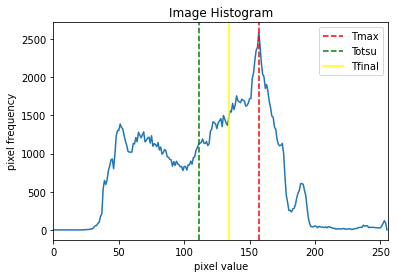

In [24]:
y = skin_detection(
    "public\\test images\Optimized-DynamicRange_SamsungGalaxyS10Plus.jpg")


In [34]:
values_vector = df.iloc[:, [1, 2, 3]].values
input_mat = np.repeat(y[np.newaxis, :], len(df.index), axis=0)
len(input_mat)

36

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
sim_matrix = cosine_similarity(values_vector, input_mat)
np.where(sim_matrix[:, 0] == max(sim_matrix[:, 0]))[0][0]


28

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
df['cs'] = [cosine_similarity([X], [y])[0][0]
            for X in df.iloc[:, [1, 2, 3]].values]
df.sort_values(by=['cs'])


,Type,H,Cr,Cb,cs
34,6,169,133,128,0.761219
33,5,179,152,134,0.776014
29,5,178,161,132,0.787950
31,5,173,158,129,0.790450
0,1,140,129,129,0.811230
35,6,126,128,140,0.841394
6,2,34,128,124,0.980756
20,4,23,150,75,0.981684
21,4,23,150,78,0.984311
1,1,20,129,127,0.987634


In [ ]:
df['cs'] = [cosine_similarity([df.iloc[0, [1, 2, 3]].values], [y])[0][0]]
df.sort_values(by=['cs'])


In [12]:
df.sort_values(by=['cs'], ascending=False).iloc[0]['Type']


5.0